In [1]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import math
from functools import reduce
%matplotlib inline
np.random.seed(42)

In [2]:
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

In [3]:
X_train, Y_train, X_test, Y_test = load()

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

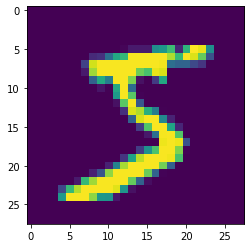

In [114]:
plt.imshow(X_train[0].reshape(28,28))
print(X_train[0])

In [10]:
class FC:
    def __init__(self, in_channel, out_channel):
        self.W = {'val': np.random.standard_normal((in_channel,out_channel)), 'grad': 0}
        self.b = {'val': np.random.randn(out_channel), 'grad': 0}
        self.cache = None
    
    def forward(self, X):
        out = np.dot(X, self.W) + self.b
        self.cache = X
        return out
    
    def backward(self, dout):
        X = self.cache
        dX = np.dot(dout, self.W['val'].T).reshape(X.shape)
        self.W['grad'] = np.dot(X.reshape(X.shape[0], np.prod(X.shape[1:])).T, dout)
        self.b['grad'] = np.sum(dout, axis=0)
        self.update()
        return dX
    
    def update(self, lr=0.001):
        self.W['val'] -= lr*self.W['grad']
        self.b['val'] -= lr*self.b['grad']

In [158]:
class Conv2d:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size,kernel_size,in_channels,out_channels)
        self.stride = stride
        self.eta = 0
        
        self.W = {'val': np.random.standard_normal((self.kernel_size)), 'grad': np.zeros(self.kernel_size)}
        self.b = {'val': np.random.standard_normal(out_channels), 'grad': np.zeros(out_channels)}
        
    def forward(self, x):
        (N,Cin,H,W) = x.shape
        self.shape = x.shape
        H_ = int((H - self.kernel_size[0]) / self.stride + 1)
        W_ = int((W - self.kernel_size[0]) / self.stride + 1)
        col_weights = self.W['val'].reshape([-1,self.out_channels])
        self.col_image = []
        conv_out = np.zeros((N,self.out_channels,H_,W_))
        for i in range(N):
            img_i = x[i]
            self.col_image_i = self.im2col(img_i,self.kernel_size[0],self.stride)
            conv_out[i] = np.reshape(np.dot(self.col_image_i, col_weights) + self.b['val'],(H_,W_,-1)).transpose(2,0,1)
            self.col_image.append(self.col_image_i)
        self.col_image = np.array(self.col_image)
        return conv_out
    
    def backward(self, dout):
        for i in range(self.shape[0]):
            self.W['grad'] += np.dot(self.col_image[i].T, col_eta)
            
    def im2col(self, image, ksize, stride):
        # image is a 3d tensor([channel, height, width])
        image_col = []
        for i in range(0, image.shape[1] - ksize + 1, stride):
            for j in range(0, image.shape[2] - ksize + 1, stride):
                col = image[:,i:i + ksize, j:j + ksize].reshape([-1])
                image_col.append(col)
        image_col = np.array(image_col)
        return image_col

In [54]:
class MaxPool2d:
    pass

In [159]:
conv2d = Conv2d(1,6,5)
out = conv2d.forward(batch)
out.shape

(2, 6, 24, 24)

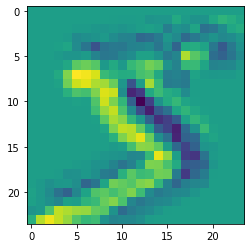

In [160]:
plt.imshow(out[0,0,:,:].reshape(24,24))

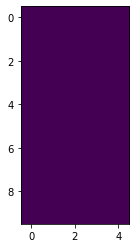

In [12]:
batch = X_train[0:2].reshape(2,1,28,28)
plt.imshow(batch[0].reshape(28,28)[0:10,0:5])